# Logistic Regression With Linear Boundary Demo

_Source: 🤖[Homemade Machine Learning](https://github.com/trekhleb/homemade-machine-learning) repository_

> ☝Before moving on with this demo you might want to take a look at:
> - 📗[Math behind the Logistic Regression](https://github.com/trekhleb/homemade-machine-learning/tree/master/homemade/logistic_regression)
> - ⚙️[Logistic Regression Source Code](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/logistic_regression/logistic_regression.py)

**Logistic regression** is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Logistic Regression is used when the dependent variable (target) is categorical.

For example:

- To predict whether an email is spam (`1`) or (`0`).
- Whether online transaction is fraudulent (`1`) or not (`0`).
- Whether the tumor is malignant (`1`) or not (`0`).

> **Demo Project:** In this example we will try to classify Iris flowers into tree categories (`Iris setosa`, `Iris virginica` and `Iris versicolor`) based on `petal_length` and `petal_width` parameters.

In [1]:
# To make debugging of logistic_regression module easier we enable imported modules autoreloading feature.
# By doing this you may change the code of logistic_regression library and all these changes will be available here.
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('../..')

### Import Dependencies

- [pandas](https://pandas.pydata.org/) - library that we will use for loading and displaying the data in a table
- [numpy](http://www.numpy.org/) - library that we will use for linear algebra operations
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [logistic_regression](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/logistic_regression/logistic_regression.py) - custom implementation of logistic regression

In [2]:
# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom logistic regression implementation.
from homemade.logistic_regression import LogisticRegression

### Load the Data

In this demo we will use [Iris data set](http://archive.ics.uci.edu/ml/datasets/Iris).

The data set consists of several samples from each of three species of Iris (`Iris setosa`, `Iris virginica` and `Iris versicolor`). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, [Ronald Fisher](https://en.wikipedia.org/wiki/Iris_flower_data_set) developed a linear discriminant model to distinguish the species from each other.

In [3]:
# Load the data.
data = pd.read_csv('../../data/iris.csv')

# Print the data table.
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA
5,5.4,3.9,1.7,0.4,SETOSA
6,4.6,3.4,1.4,0.3,SETOSA
7,5.0,3.4,1.5,0.2,SETOSA
8,4.4,2.9,1.4,0.2,SETOSA
9,4.9,3.1,1.5,0.1,SETOSA


### Plot the Data

Let's take two parameters `petal_length` and `petal_width` for each flower into consideration and plot the dependency of the Iris class on these two parameters.

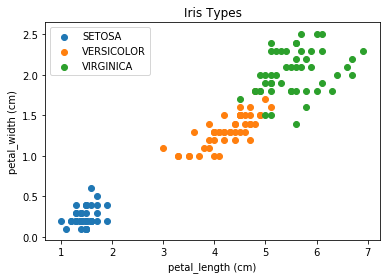

In [4]:
# List of suppported Iris classes.
iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Pick the Iris parameters for consideration.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Plot the scatter for every type of Iris.
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )

# Plot the data.    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Types')
plt.legend()
plt.show()

### Prepara the Data for Training

Let's extract `petal_length` and `petal_width` data and form a training feature set and let's also form out training labels set.

In [5]:
# Get total number of Iris examples.
num_examples = data.shape[0]

# Get features.
x_train = data[[x_axis, y_axis]].values.reshape((num_examples, 2))
# Get labels.
y_train = data['class'].values.reshape((num_examples, 1))

### Init and Train Logistic Regression Model

> ☝🏻This is the place where you might want to play with model configuration.

- `polynomial_degree` - this parameter will allow you to add additional polynomial features of certain degree. More features - more curved the line will be.
- `max_iterations` - this is the maximum number of iterations that gradient descent algorithm will use to find the minimum of a cost function. Low numbers may prevent gradient descent from reaching the minimum. High numbers will make the algorithm work longer without improving its accuracy.
- `regularization_param` - parameter that will fight overfitting. The higher the parameter, the simplier is the model will be.
- `polynomial_degree` - the degree of additional polynomial features (`x1^2 * x2, x1^2 * x2^2, ...`). This will allow you to curve the predictions.
- `sinusoid_degree` - the degree of sinusoid parameter multipliers of additional features (`sin(x), sin(2*x), ...`). This will allow you to curve the predictions by adding sinusoidal component to the prediction curve.

In [6]:
# Set up linear regression parameters.
max_iterations = 1000  # Max number of gradient descent iterations.
regularization_param = 0  # Helps to fight model overfitting.
polynomial_degree = 0  # The degree of additional polynomial features.
sinusoid_degree = 0  # The degree of sinusoid parameter multipliers of additional features.

# Init logistic regression instance.
logistic_regression = LogisticRegression(x_train, y_train, polynomial_degree, sinusoid_degree)

# Train logistic regression.
(thetas, costs) = logistic_regression.train(regularization_param, max_iterations)

# Print model parameters that have been learned.
pd.DataFrame(thetas, columns=['Theta 1', 'Theta 2', 'Theta 3'], index=['SETOSA', 'VERSICOLOR', 'VIRGINICA'])

,Theta 1,Theta 2,Theta 3
SETOSA,30.291853,-8.404206,-12.313125
VERSICOLOR,-2.858904,1.546523,-3.107221
VIRGINICA,-45.349540,5.766294,10.458614


### Analyze Gradient Descent Progress

The plot below illustrates how the cost function value changes over each iteration. You should see it decreasing. 

In case if cost function value increases it may mean that gradient descent missed the cost function minimum and with each step it goes further away from it.

From this plot you may also get an understanding of how many iterations you need to get an optimal value of the cost function. 

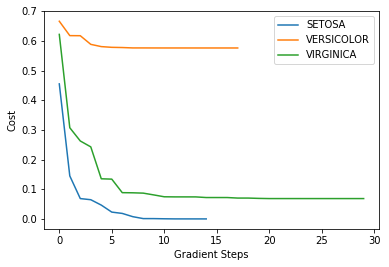

In [7]:
# Draw gradient descent progress for each label.
labels = logistic_regression.unique_labels
plt.plot(range(len(costs[0])), costs[0], label=labels[0])
plt.plot(range(len(costs[1])), costs[1], label=labels[1])
plt.plot(range(len(costs[2])), costs[2], label=labels[2])

plt.xlabel('Gradient Steps')
plt.ylabel('Cost')
plt.legend()
plt.show()

### Calculate Model Training Precision

Calculate how many flowers from the training set have been guessed correctly. 

In [8]:
# Make training set predictions.
y_train_predictions = logistic_regression.predict(x_train)

# Check what percentage of them are actually correct.
precision = np.sum(y_train_predictions == y_train) / y_train.shape[0] * 100

print('Precision: {:5.4f}%'.format(precision))

Precision: 96.0000%


### Draw Decision Boundaries

Let's build our decision boundaries. These are the lines that distinguish classes from each other. This will give us a pretty clear overview of how successfull our training process was. You should see clear distinguishment of three sectors on the data plain. 

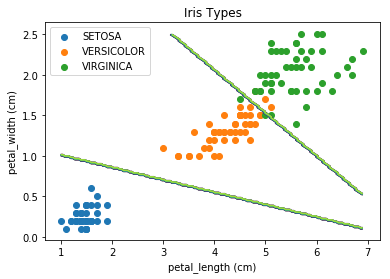

In [9]:
# Get the number of training examples.
num_examples = x_train.shape[0]

# Set up how many calculations we want to do along every axis. 
samples = 150

# Generate test ranges for x and y axis.
x_min = np.min(x_train[:, 0])
x_max = np.max(x_train[:, 0])

y_min = np.min(x_train[:, 1])
y_max = np.max(x_train[:, 1])

X = np.linspace(x_min, x_max, samples)
Y = np.linspace(y_min, y_max, samples)

# z axis will contain our predictions. So let's get predictions for every pair of x and y.
Z_setosa = np.zeros((samples, samples))
Z_versicolor = np.zeros((samples, samples))
Z_virginica = np.zeros((samples, samples))

for x_index, x in enumerate(X):
    for y_index, y in enumerate(Y):
        data = np.array([[x, y]])
        prediction = logistic_regression.predict(data)[0][0]
        if prediction == 'SETOSA':
            Z_setosa[x_index][y_index] = 1
        elif prediction == 'VERSICOLOR':
            Z_versicolor[x_index][y_index] = 1
        elif prediction == 'VIRGINICA':
            Z_virginica[x_index][y_index] = 1

# Now, when we have x, y and z axes being setup and calculated we may print decision boundaries.
for iris_type in iris_types:
    plt.scatter(
        x_train[(y_train == iris_type).flatten(), 0],
        x_train[(y_train == iris_type).flatten(), 1],
        label=iris_type
    )

plt.contour(X, Y, Z_setosa)
plt.contour(X, Y, Z_versicolor)
plt.contour(X, Y, Z_virginica)
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Types')
plt.legend()
plt.show()